In [32]:
# Note:

# **k-means算法是很典型的`基于距离`的聚类算法，采用距离作为相似性的评价指标，即认为两个对象的距离越近，其相似度就越大。
# 该算法认为簇是由距离靠近的对象组成的，因此把得到紧凑且独立的簇作为最终目标。**

# **算法的计算过程的直观表达：**
# 
#   - 1、从D中随机取k个元素，作为k个簇的各自的中心。
# 
#   - 2、分别计算剩下的元素到k个簇中心的相异度，将这些元素分别划归到相异度最低的簇。
# 
#   - 3、根据聚类结果，重新计算k个簇各自的中心，计算方法是取簇中所有元素各自维度的算术平均数。
# 
#   - 4、将D中全部元素按照新的中心重新聚类。
# 
#   - 5、重复第4步，直到聚类结果(中心)不再变化。
# 
#   - 6、将结果输出。 

# 选择k = 聚类数目的确定（主观）
# 
# - **按需选择：**简单地说就是按照建模的需求和目的来选择聚类的个数
# 
# - **观察法：**就是用肉眼看，看这些点大概聚成几堆。
# 
# - **Canopy算法：** (也是一种聚类算法，是“粗划分”，可以用这个得出的结果作k)
#         （1）设样本集合为S，确定两个阈值t1和t2，且t1>t2。
#         （2）任取一个样本点p，作为一个Canopy，记为C，从S中移除p。
#         （3）计算S中所有点到p的距离dist
#         （4）若dist<t1，则将相应点归到C,作为弱关联。
#         （5）若dist<t2，则将相应点移出S，作为强关联。
#         （6）重复（2）~（5），直至S为空。
# 

from sklearn.cluster import KMeans

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Column 1: Number Hours/Week
# Column 2: Number Sections


with open('/Users/FamL/Study/申研 Job Apply/BA research/Clustering - Newspaper/np2.dat','r') as f:
    df = pd.DataFrame(l.rstrip().split() for l in f)

df = df.iloc[1:]
df= df.astype(int)
df.columns = ["Hours/Week","Sections"]
print(df)

      Hours/Week  Sections
1              0         0
2              0         0
3              0         0
4              0         0
5              0         0
6              0         0
7              0         0
8              0         0
9              0         0
10             0         0
11             0         0
12             0         0
13             0         0
14             0         0
15             0         0
16             0         0
17             0         0
18             0         0
19             0         0
20             0         0
21             0         0
22             0         0
23             0         0
24             0         0
25             0         0
26             0         0
27             0         0
28             0         0
29             0         0
30             0         0
...          ...       ...
2910           7         7
2911           7         7
2912           7         7
2913           7         7
2914           7         7
2

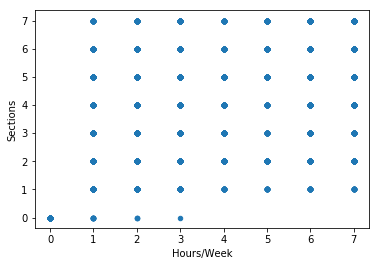

In [34]:
# 先肉眼观察这个数据大概是什么结构
df.plot.scatter(x='Hours/Week',y='Sections')

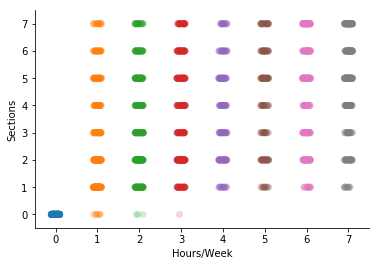

In [35]:
# 由于密度都一样，看不出来，所以加jitter
import seaborn as sns

sns.stripplot(x='Hours/Week',y='Sections', data=df, size=7, alpha=.2, jitter=True, edgecolor='none')
sns.despine()

In [36]:
# 调用 Scikit-learn 中的 Kmeans 函数
# 因为 Column 1 为 Number Hours/Week，为0-7，所以先尝试 k = 7
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)  # 模型拟合数据

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

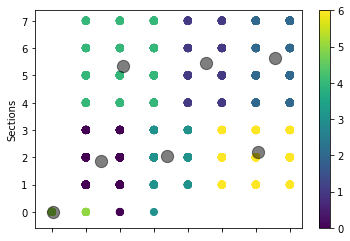

In [39]:
# 模型预测数据
y_kmeans = kmeans.predict(df)
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=y_kmeans,cmap='viridis')

# 画出中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)

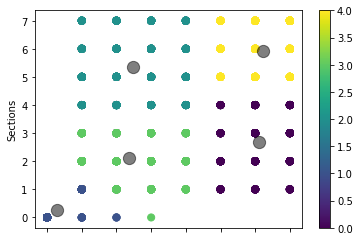

In [10]:
# 7个蔟太多，overfit
# 尝试 n = 5
model5 = KMeans(n_clusters = 5).fit(df)
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=model5.labels_.astype(float),cmap='viridis')

# 画出中心
centers = model5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)

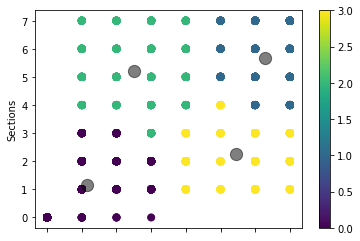

In [11]:
# 尝试 n = 4
model4 = KMeans(n_clusters = 4).fit(df)
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=model4.labels_.astype(float),cmap='viridis')

# 画出中心
centers = model4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5)

In [12]:
# K = 4 的时候，看图的分类感觉不如 K = 5分的好，所以取 K = 5 的结果

In [13]:
# Note:
# DBSCAN = Density-Based Spatial Clustering of Applications with Noise

# 密度聚类的思想
# 只要样本点的密度大于某阈值，则将该样本添加到最近的簇中。
# 例如，一个中国地图上标着每平方公里的人又密度，我们可以通过这个密度进行聚类，某个地方密度很大，就可以认为这个地方是个城市

# 密度聚类原理
# 它将簇定义为密度相连的点的最大集合，于是能够把具有足够高密度的区域划分为簇，并可在有“噪声”的数据中发现任意形状的聚类

# DBSCAN算法中的若干概念：核心对象、直接密度可达、密度可达、密度相连
# DBSCAN算法中的若干概念：蔟 = 一个基于密度的蔟是最大的密度相连对象的集；噪声 = 不包括在任何蔟中的对象

# DBSCAN算法步骤
# Step1: 对于所有的样本集合求其邻域(范围：eps)内的对象数目(min_sample)，将样本集分为核心对象集和非核心对象集
# Step2: 如果核心对象集合为空集，则算法结束;否则转入Step3
# Step3: 从任意一个核心对象开始，将其所有邻域内的对象加入当前簇中，再对其邻域内的核心对象以同样的方式进行迭代，直到无核心对象对止。 
# Step4: 选取一个之前未选择的核心对象，以与Step3相同的方式进的新的簇的迭代。
# Step5: 直到再无未选择的核心对象，算法停止。剩余的在未在簇中的对象为孤立的噪声对象

# DBSCAN与k-means比较
# 和传统的K-Means算法相比，DBSCAN最大的不同就是不需要输入类别数k，当然它最大的优势是可以发现任意形状的聚类簇，而不是像K-Means，一般仅仅
# 使用于凸的样本集聚类。同时它在聚类的同时还可以找出异常点，这点和BIRCH算法类似。(对比KMeans: KMeans可能更适合有高斯分布的序列形式；
# 对于类似“双月牙”的分布，用密度聚类比较好)

Estimated number of clusters: 50
Estimated number of noise points: 13


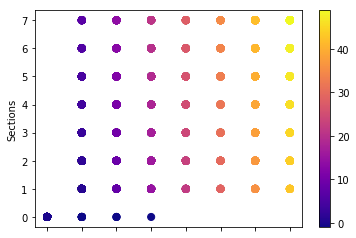

In [17]:
# Compute DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

db0310 = DBSCAN(eps = 0.3, min_samples = 10).fit(df)
core_samples_mask = np.zeros_like(db0310.labels_, dtype=bool)
core_samples_mask[db0310.core_sample_indices_] = True
labels = db0310.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=db0310.labels_.astype(float),cmap='plasma')

Estimated number of clusters: 1
Estimated number of noise points: 0


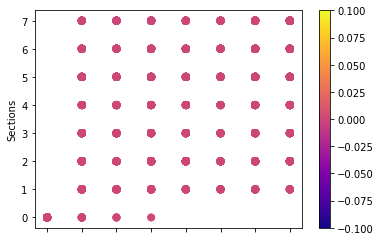

In [18]:
# 如果用 eps = 0.3, min_sample = 10的话，会分成50个蔟，太多。于是尝试更大的eps距离和更多的min_sample

# Compute DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

db1050 = DBSCAN(eps = 1, min_samples = 50).fit(df)
core_samples_mask = np.zeros_like(db1050.labels_, dtype=bool)
core_samples_mask[db1050.core_sample_indices_] = True
labels = db1050.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=db1050.labels_.astype(float),cmap='plasma')

Estimated number of clusters: 23
Estimated number of noise points: 916


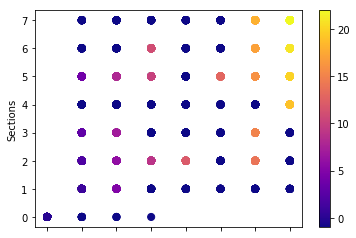

In [19]:
# 如果用 eps = 1, min_sample = 50的话，会分成1个蔟，太少。于是尝试更小的eps距离

# Compute DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

db0550 = DBSCAN(eps = 0.5, min_samples = 50).fit(df)
core_samples_mask = np.zeros_like(db0550.labels_, dtype=bool)
core_samples_mask[db0550.core_sample_indices_] = True
labels = db0550.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=db0550.labels_.astype(float),cmap='plasma')


In [ ]:
# 在尝试过程中发现，当eps = 1，会把所有点都分到同一个蔟里
# 推断：原因是因为每两个点直接的距离不超过1，当距离 = 1，就会把所有相邻区域内的对象加入当前蔟；
# 推断：其邻域内的核心对象又继续会把所有距离为1以内的点加入当前蔟，最后所有点都加入到了同一个蔟。

# 而当eps小于1，无论多小或者多接近1，它对结果都没有影响。影响结果的是min_sample，并且：蔟的数量很多 or 噪音很多
# 推断：因为这个图像里每个点之间距离相同，所以用density-based并不是一个最好的选择
# 推断：应该选择用KMeans方法，并且 k = 5的时候聚类效果最好

Estimated number of clusters: 5
Estimated number of noise points: 2113


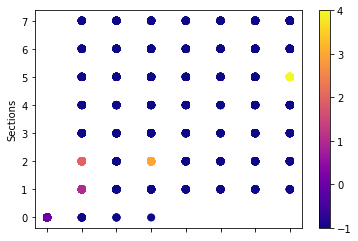

In [31]:
# 应该是5个cluster

# Compute DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

db5100 = DBSCAN(eps = 0.5, min_samples = 100).fit(df)
core_samples_mask = np.zeros_like(db5100.labels_, dtype=bool)
core_samples_mask[db5100.core_sample_indices_] = True
labels = db5100.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
df.plot.scatter(x='Hours/Week',y='Sections',s=50,c=db5100.labels_.astype(float),cmap='plasma')